In [170]:
import tables
import matplotlib.pyplot as plt
%matplotlib inline

In [136]:
# sample proton data
data_path = '/Users/nicolamarinello/ctasoft/simulations/Paranal_proton_North_20deg_3HB9_DL1_ML1/proton_20deg_0deg_srun13316-33715___cta-prod3_desert-2150m-Paranal-HB9.h5'
data = tables.open_file(data_path)

# sample gamma-ray data
#data_g_path = '/Users/nicolamarinello/ctasoft/simulations/Paranal_gamma-diffuse_North_20deg_3HB9_DL1_ML1/gamma_20deg_0deg_srun5865-23126___cta-prod3_desert-2150m-Paranal-HB9_cone10.h5'
#data_g = tables.open_file(data_g_path)

In [137]:
data_ainfo = data.root.Array_Info
data_einfo = data.root.Event_Info
data_LST = data.root.LST

print(repr(data_ainfo))
print(repr(data_einfo))
print(repr(data_LST))

print(data_LST.description.event_index)
print(data_LST.description.image_charge)
print(data_LST.description.image_peak_times)
print(data_ainfo.description.tel_type)

/Array_Info (Table(289,)) 'Table of array data'
  description := {
  "run_array_direction": Float32Col(shape=(2,), dflt=0.0, pos=0),
  "tel_id": UInt8Col(shape=(), dflt=0, pos=1),
  "tel_type": StringCol(itemsize=8, shape=(), dflt=b'', pos=2),
  "tel_x": Float32Col(shape=(), dflt=0.0, pos=3),
  "tel_y": Float32Col(shape=(), dflt=0.0, pos=4),
  "tel_z": Float32Col(shape=(), dflt=0.0, pos=5)}
  byteorder := 'little'
  chunkshape := (2259,)
/Event_Info (Table(3023,)) 'Table of Events'
  description := {
  "alt": Float32Col(shape=(), dflt=0.0, pos=0),
  "az": Float32Col(shape=(), dflt=0.0, pos=1),
  "core_x": Float32Col(shape=(), dflt=0.0, pos=2),
  "core_y": Float32Col(shape=(), dflt=0.0, pos=3),
  "event_number": UInt32Col(shape=(), dflt=0, pos=4),
  "h_first_int": Float32Col(shape=(), dflt=0.0, pos=5),
  "mc_energy": Float32Col(shape=(), dflt=0.0, pos=6),
  "particle_id": UInt8Col(shape=(), dflt=0, pos=7),
  "run_number": UInt32Col(shape=(), dflt=0, pos=8),
  "LST_indices": Int32Col(sha

In [151]:
#array info data
ai_run_array_direction = [x['run_array_direction'] for x in data_ainfo.iterrows()]
ai_tel_id = [x['tel_id'] for x in data_ainfo.iterrows()]
ai_tel_type = [x['tel_type'] for x in data_ainfo.iterrows()]
ai_tel_x = [x['tel_x'] for x in data_ainfo.iterrows()]
ai_tel_y = [x['tel_y'] for x in data_ainfo.iterrows()]
ai_tel_z = [x['tel_z'] for x in data_ainfo.iterrows()]

#event info data
ei_alt = [x['alt'] for x in data_einfo.iterrows()]
ei_az = [x['az'] for x in data_einfo.iterrows()]
ei_core_x = [x['core_x'] for x in data_einfo.iterrows()]
ei_core_y = [x['core_y'] for x in data_einfo.iterrows()]
ei_event_number = [x['event_number'] for x in data_einfo.iterrows()]
ei_h_first_int = [x['h_first_int'] for x in data_einfo.iterrows()]
ei_mc_energy = [x['mc_energy'] for x in data_einfo.iterrows()]
ei_particle_id = [x['particle_id'] for x in data_einfo.iterrows()]
ei_run_number = [x['run_number'] for x in data_einfo.iterrows()]
ei_LST_indices = [x['LST_indices'] for x in data_einfo.iterrows()]

#LST data
LST_event_index=[x['event_index'] for x in data_LST.iterrows()]
LST_image_charge=[x['image_charge'] for x in data_LST.iterrows()]
LST_image_peak_times=[x['image_peak_times'] for x in data_LST.iterrows()]

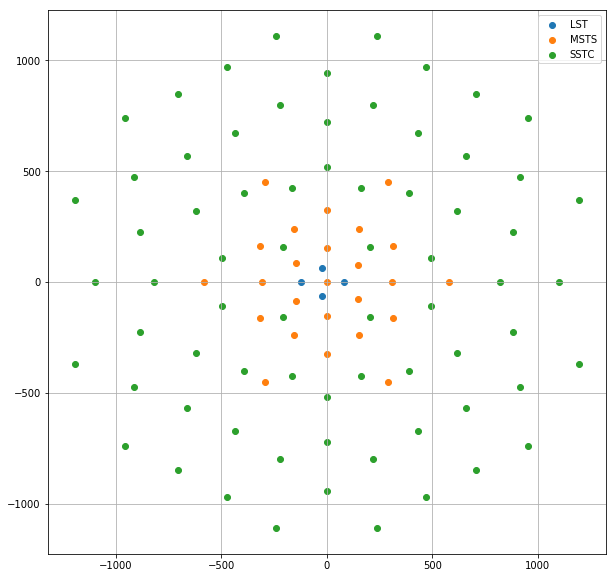

In [173]:
# array of telescopes

tel_types=['LST','MSTS','SSTC']

arr_table=data_ainfo

fig, ax = plt.subplots(figsize=(10,10))

for tel_type in tel_types:
    tel_x = [x['tel_x'] for x in arr_table.iterrows() if x['tel_type'] == tel_type.encode('ascii')]
    tel_y = [x['tel_y'] for x in arr_table.iterrows() if x['tel_type'] == tel_type.encode('ascii')]
    plt.scatter(tel_x, tel_y, label=tel_type)
    
ax.legend()
ax.grid()
plt.show()

In [183]:
tel_type = 'LST'
tel_ids = [x['tel_id'] for x in data_ainfo.iterrows() if x['tel_type'] == tel_type.encode('ascii')]
print(tel_ids)

[1, 2, 3, 4]


In [163]:
event_index = 44
my_event = data_einfo[event_index]
print('Event number: {}'.format(my_event['event_number']))
print('Energy: {} TeV'.format(my_event['mc_energy']))
print('Alt: {} rad'.format(my_event['alt']))
print('Az: {} rad'.format(my_event['az']))
my_indices = my_event['LST_indices']
print('LST_indices: ' + str(my_indices))

Event number: 494209
Energy: 0.5507442951202393 TeV
Alt: 1.2068253755569458 rad
Az: 0.18052926659584045 rad
LST_indices: [ 0 28 29  0]


In [178]:
for img_index in my_indices:
    if img_index > 0:
        img_charge = LST_image_charge[img_index]
        img_time = LST_image_peak_times[img_index]
        print(img_charge)
        print(img_time)

[-0.90368205 -0.1790721  -1.0608552  ... -0.72692055  0.37860617
  3.2084312 ]
[ 7.  8.  1. ... 18.  6.  6.]
[-0.9147726  -1.9080521  -2.6048093  ... -0.8277344  -0.6274846
 -0.51985115]
[24.  5. 23. ...  6.  6. 27.]
